In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [2]:
# Load the labeled dataset
df = pd.read_csv('../datasets/cleaned_datasets/cleaned_twitter_dataset_without_lemmatization.csv')
df.head()

,text,target
0,"['upset', 'cant', 'update', 'facebook', 'texti...",0
1,"['kenichan', 'dived', 'many', 'times', 'ball',...",0
2,"['whole', 'body', 'feels', 'itchy', 'like', 'f...",0
3,"['nationwideclass', 'behaving', 'im', 'mad', '...",0
4,"['kwesidei', 'whole', 'crew']",0


In [3]:
# Remove rows with missing values
df = df.dropna(subset=['text', 'target'])
df.shape

(1599999, 2)

In [4]:
# Split dataset into tweets and labels
tweets = df['text'].values
labels = df['target'].values

In [5]:
# Vectorize tweets using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tweets)

In [6]:
# Apply SVD to reduce dimensionality to 2
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X)

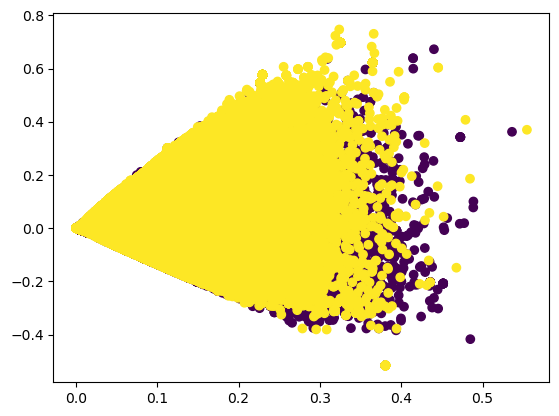

In [7]:
# Plot the data points in 2D space
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels)
plt.show()

In [8]:
# Initialize LSA model
lsa = TruncatedSVD(n_components=500)

In [9]:
# Fit LSA model using fit_transform() and print progress indicator at each batch
batch_size = 10000
X_lsa = None  # initialize X_lsa variable

for i in range(0, X.shape[0], batch_size):
    X_batch = X[i:i+batch_size]
    X_batch_lsa = lsa.fit_transform(X_batch)
    X_lsa = np.vstack([X_lsa, X_batch_lsa]) if X_lsa is not None else X_batch_lsa
    print(f"Processed {i} out of {X.shape[0]} rows...", end='\r')

In [10]:
# Transform input matrix using the fitted LSA model
X_lsa = lsa.transform(X)

In [16]:
import pickle

# Save LSA-transformed data to a pickle file
with open('final_models/X_lsa.pkl', 'wb') as f:
    pickle.dump(X_lsa, f)